In [37]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mtplt
sns.set(rc={'figure.figsize':(14,7)})

In [38]:
#load data
data = pd.read_csv("..\..\..\Data\Day\S&P 500 Historical Data00-20Linear.csv")

In [39]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-01-03,1455.2,1469.2,1478.0,1438.4,NaN,-0.95%
1,2000-01-04,1399.4,1455.2,1455.2,1397.4,NaN,-3.83%
2,2000-01-05,1402.1,1399.4,1413.3,1377.7,NaN,0.19%
3,2000-01-06,1403.5,1402.1,1411.9,1392.0,NaN,0.10%
4,2000-01-07,1441.5,1403.5,1441.5,1400.5,NaN,2.71%


In [40]:
#transform data
data = data.replace(",", "", regex=True)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.set_index('Date')
data.Price = data.Price.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)
data["Vol."] = data["Vol."].astype(float)

In [41]:
special_data = pd.DataFrame(data)

In [42]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2014-01-01')]
special_data.index = data.index[:len(special_data)]

In [43]:
#change indexes
special_data.set_index('Date', inplace = True)

In [44]:
data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-01-03,1455.200000,1469.200000,1478.000000,1438.400000,NaN,-0.95%
1,2000-01-04,1399.400000,1455.200000,1455.200000,1397.400000,NaN,-3.83%
2,2000-01-05,1402.100000,1399.400000,1413.300000,1377.700000,NaN,0.19%
3,2000-01-06,1403.500000,1402.100000,1411.900000,1392.000000,NaN,0.10%
4,2000-01-07,1441.500000,1403.500000,1441.500000,1400.500000,NaN,2.71%
5,2000-01-08,1446.866667,1416.166667,1449.133333,1414.166667,NaN,NaN
6,2000-01-09,1452.233333,1428.833333,1456.766667,1427.833333,NaN,NaN
7,2000-01-10,1457.600000,1441.500000,1464.400000,1441.500000,NaN,1.12%
8,2000-01-11,1438.600000,1457.600000,1458.800000,1434.400000,NaN,-1.30%
9,2000-01-12,1432.200000,1439.100000,1445.300000,1427.300000,NaN,-0.44%


In [45]:
special_data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-02,1124.045000,1121.580000,1130.7550,1115.685000,NaN,NaN
2010-01-03,1128.517500,1119.070000,1132.3125,1116.122500,NaN,NaN
2010-01-04,1132.990000,1116.560000,1133.8700,1116.560000,NaN,1.60%
2010-01-05,1136.520000,1132.660000,1136.6300,1129.660000,NaN,0.31%
2010-01-06,1137.140000,1135.710000,1139.1900,1133.950000,NaN,0.05%
2010-01-07,1141.690000,1136.270000,1142.4600,1131.320000,NaN,0.40%
2010-01-08,1144.980000,1140.520000,1145.3900,1136.220000,NaN,0.29%
2010-01-09,1145.646667,1142.333333,1146.8400,1138.153333,NaN,NaN
2010-01-10,1146.313333,1144.146667,1148.2900,1140.086667,NaN,NaN


In [46]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Price,Open,High,Low,Vol.,Change %,new_index,new_date
Date,,,,,,,,
2010-01-02,1124.0450,1121.58,1130.7550,1115.6850,NaN,NaN,1124.0450,1124.0450
2010-01-03,1128.5175,1119.07,1132.3125,1116.1225,NaN,NaN,1128.5175,1128.5175
2010-01-04,1132.9900,1116.56,1133.8700,1116.5600,NaN,1.60%,1132.9900,1132.9900
2010-01-05,1136.5200,1132.66,1136.6300,1129.6600,NaN,0.31%,1136.5200,1136.5200
2010-01-06,1137.1400,1135.71,1139.1900,1133.9500,NaN,0.05%,1137.1400,1137.1400


In [47]:
import datetime

special_data.loc[special_data.index[0], 'new_index'] = 1262563200
special_data.loc[special_data.index[0], 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[special_data.index[0], 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(1, len(special_data.new_index)):
    special_data.loc[special_data.index[i], 'new_index'] = special_data.at[special_data.index[i-1], 'new_index'] + 86400
    special_data.loc[special_data.index[i], 'new_date'] = datetime.datetime.fromtimestamp(special_data.at[special_data.index[i], 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2010-01-04 07:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [48]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [49]:
special_data.head(20)

,Price,Open,High,Low,Vol.,Change %,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1124.045000,1121.580000,1130.7550,1115.685000,NaN,NaN,1.262563e+09
2010-01-05 07:00:00,1128.517500,1119.070000,1132.3125,1116.122500,NaN,NaN,1.262650e+09
2010-01-06 07:00:00,1132.990000,1116.560000,1133.8700,1116.560000,NaN,1.60%,1.262736e+09
2010-01-07 07:00:00,1136.520000,1132.660000,1136.6300,1129.660000,NaN,0.31%,1.262822e+09
2010-01-08 07:00:00,1137.140000,1135.710000,1139.1900,1133.950000,NaN,0.05%,1.262909e+09
2010-01-09 07:00:00,1141.690000,1136.270000,1142.4600,1131.320000,NaN,0.40%,1.262995e+09
2010-01-10 07:00:00,1144.980000,1140.520000,1145.3900,1136.220000,NaN,0.29%,1.263082e+09
2010-01-11 07:00:00,1145.646667,1142.333333,1146.8400,1138.153333,NaN,NaN,1.263168e+09
2010-01-12 07:00:00,1146.313333,1144.146667,1148.2900,1140.086667,NaN,NaN,1.263254e+09


In [50]:
special_data.rename(columns = {'Price': 'Close'}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

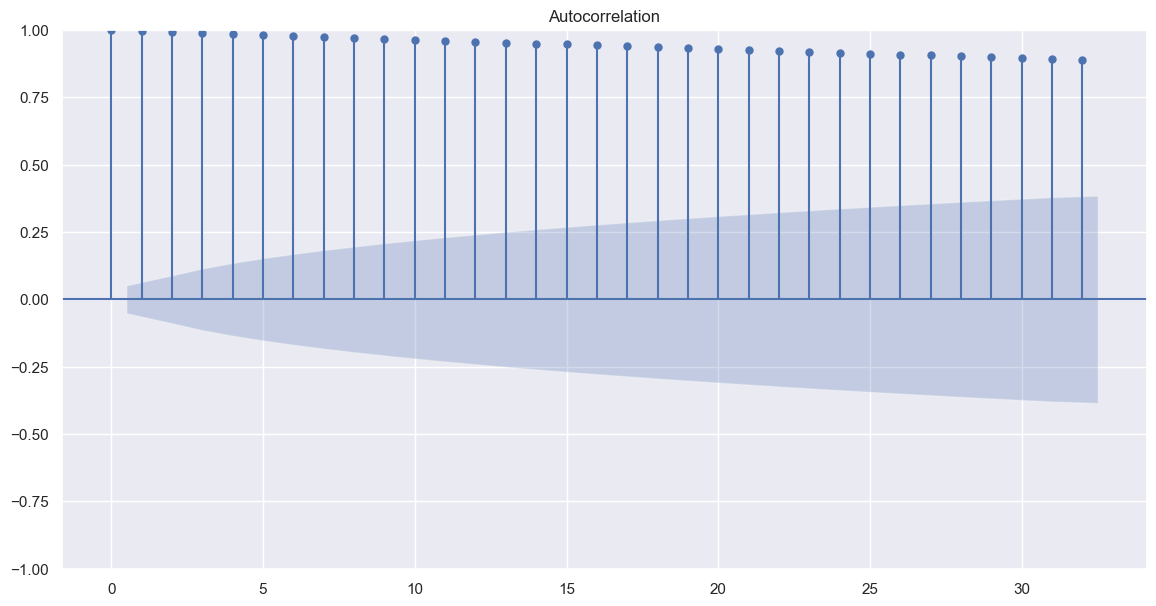

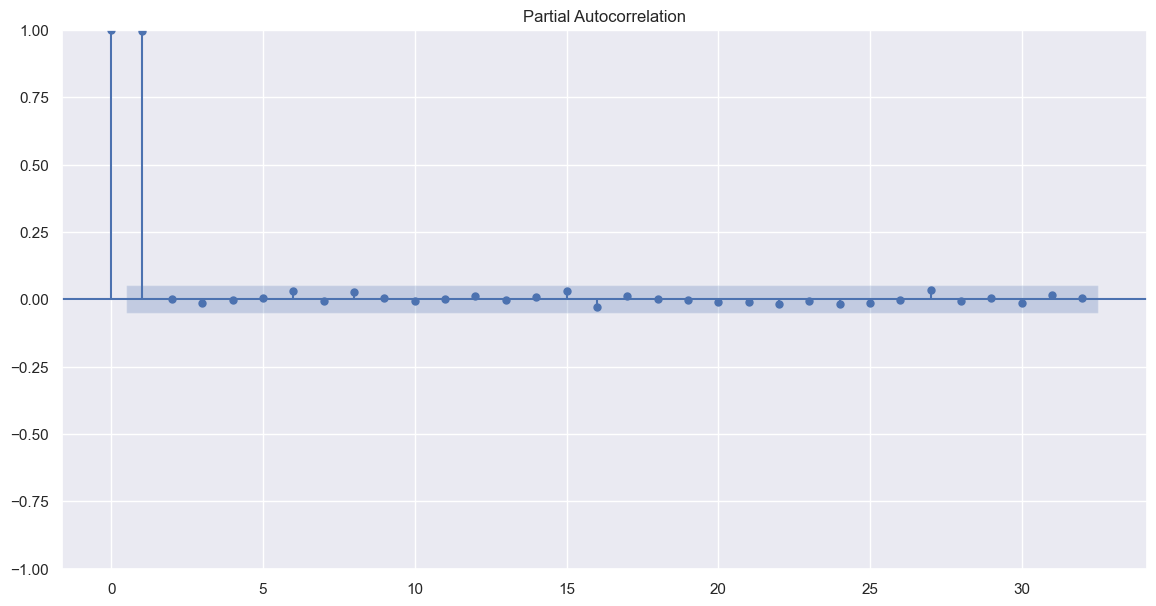

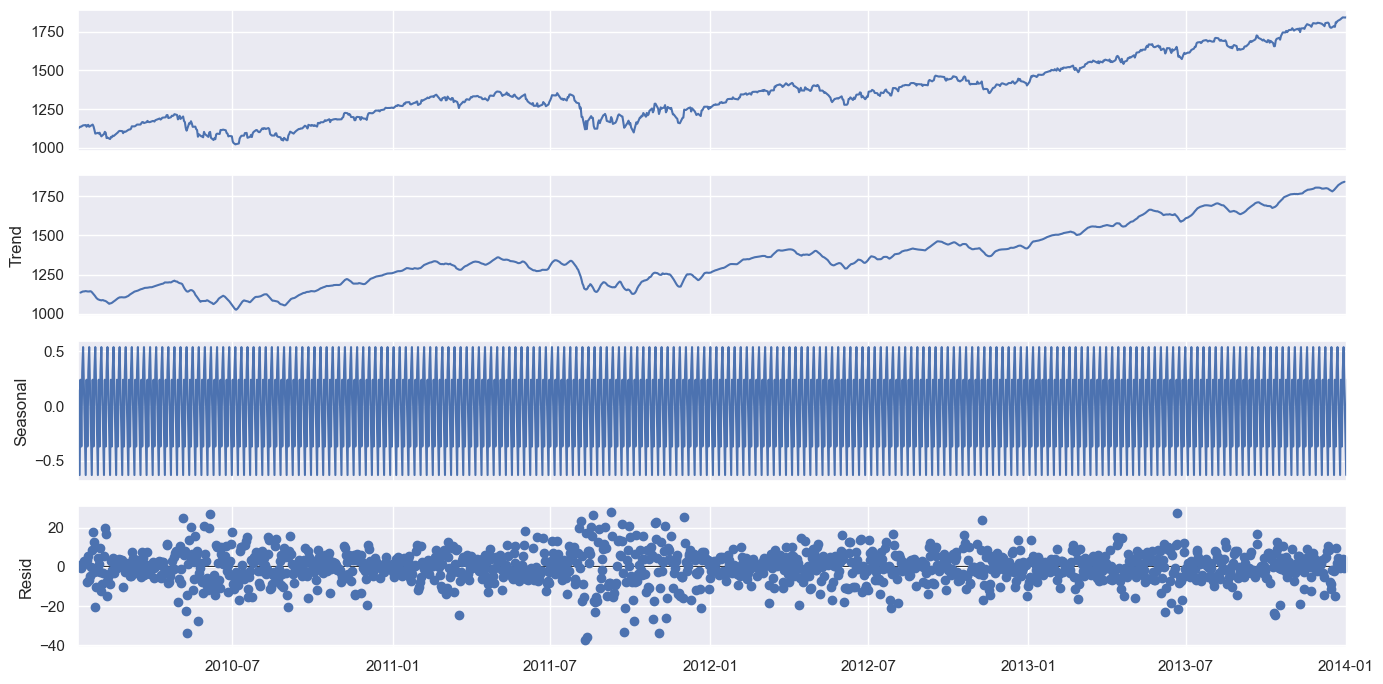

0.43496219012788145
0.9827563572005192


In [52]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

In [53]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

ForecastError: Before calling a model, please make sure you have generated future dates by calling generate_future_dates(), set_last_future_date(), or ingest_Xvars_df(use_future_dates=True).

In [54]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [55]:
adf_test(special_data['Close'])

1. ADF :  0.43496219012788145
2. P-Value :  0.9827563572005192
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1452
5. Critical Values :
	 1% :  -3.4348616379354793
	 5% :  -2.8635325860671696
	 10% :  -2.567830836482784


In [56]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5477.411
Date:                Sun, 17 Dec 2023   AIC                          10966.822
Time:                        17:51:36   BIC                          10998.535
Sample:                    01-04-2010   HQIC                         10978.653
                         - 01-02-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3344      0.190      1.762      0.078      -0.038       0.706
ar.L1          1.2582      0.045     27.748      0.000       1.169       1.347
ar.L2         -0.9261      0.041    -22.772      0.000      -1.006      -0.846
ma.L1         -1.2353      0.045    -27.305      0.000      -1.324      -1.147
ma.L2          0.9263      0.041     22.559      0.000       0.846       1.007
sigma2       106.8908      2.172     49.202      0.000     102.633     111.149
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1531.06
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.35
Prob(H) (two-sided):                  0.11   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
data_len = len(special_data)

In [58]:
train_len = data_len * 0.9
test_len = data_len - train_len

In [59]:
train_data = special_data.iloc[:int(train_len)]

In [60]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [61]:
test_data.Close

new_date
2013-08-10 07:00:00    1697.48
2013-08-11 07:00:00    1691.42
2013-08-12 07:00:00    1690.77
2013-08-13 07:00:00    1690.12
2013-08-14 07:00:00    1689.47
                        ...   
2013-12-29 07:00:00    1841.40
2013-12-30 07:00:00    1841.29
2013-12-31 07:00:00    1841.18
2014-01-01 07:00:00    1841.07
2014-01-02 07:00:00    1848.36
Name: Close, Length: 146, dtype: float64

In [62]:
train_data

,Close,Open,High,Low,Vol.,Change %,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1124.045000,1121.580000,1130.755000,1115.685000,NaN,NaN,1.262563e+09
2010-01-05 07:00:00,1128.517500,1119.070000,1132.312500,1116.122500,NaN,NaN,1.262650e+09
2010-01-06 07:00:00,1132.990000,1116.560000,1133.870000,1116.560000,NaN,1.60%,1.262736e+09
2010-01-07 07:00:00,1136.520000,1132.660000,1136.630000,1129.660000,NaN,0.31%,1.262822e+09
2010-01-08 07:00:00,1137.140000,1135.710000,1139.190000,1133.950000,NaN,0.05%,1.262909e+09
...,...,...,...,...,...,...,...
2013-08-05 07:00:00,1708.826667,1706.736667,1709.526667,1701.636667,NaN,NaN,1.375661e+09
2013-08-06 07:00:00,1707.983333,1707.373333,1709.383333,1702.593333,NaN,NaN,1.375747e+09
2013-08-07 07:00:00,1707.140000,1708.010000,1709.240000,1703.550000,NaN,-0.15%,1.375834e+09


In [63]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=9911.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=9913.007, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=9912.517, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=9914.416, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=9916.189, Time=0.29 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=9906.972, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=9912.968, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=9914.280, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=9914.465, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=9916.406, Time=0.35 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=9911.741, Time=0.57 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=9906.108, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=9912.578, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=9914.577, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=9909.974, Time=0.43 sec
 ARIMA(2,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1314
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -4938.504
Date:                Sun, 17 Dec 2023   AIC                           9901.009
Time:                        17:52:00   BIC                           9963.169
Sample:                    01-04-2010   HQIC                          9924.320
                         - 08-09-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4138      0.332      1.245      0.213      -0.237       1.065
ar.L1         -0.4739      0.155     -3.062      0.002      -0.777      -0.171
ar.L2          0.3385      0.177      1.917      0.055      -0.008       0.685
ar.L3          0.6696      0.138      4.848      0.000       0.399       0.940
ar.L4         -0.0355      0.184     -0.193      0.847      -0.395       0.324
ar.L5         -0.4530      0.131     -3.447      0.001      -0.711      -0.195
ma.L1          0.4980      0.163      3.054      0.002       0.178       0.818
ma.L2         -0.2859      0.187     -1.532      0.125      -0.652       0.080
ma.L3         -0.6634      0.143     -4.639      0.000      -0.944      -0.383
ma.L4         -0.0087      0.194     -0.045      0.964      -0.389       0.372
ma.L5          0.3277      0.141      2.319      0.020       0.051       0.605
sigma2       108.1868      2.537     42.637      0.000     103.214     113.160
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1179.37
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.49
Prob(H) (two-sided):                  0.11   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

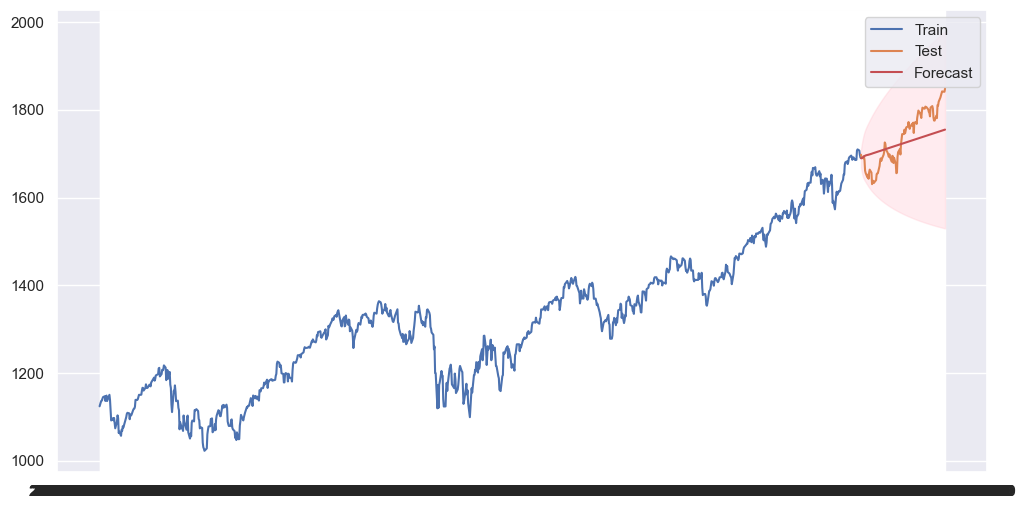

In [64]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [65]:
def calculate_metrics(array1, array2):
    # Проверка на совпадение длин массивов
    if len(array1) != len(array2):
        raise ValueError("Длины массивов должны совпадать")

    # Вычисление отклонений
    deviations = np.abs(np.array(array1) - np.array(array2))

    # Минимальное и максимальное отклонение
    min_deviation = np.min(deviations)
    max_deviation = np.max(deviations)

    # Процентное минимальное и максимальное отклонение
    min_deviation_percentage = min_deviation / np.max(np.abs(array1)) * 100
    max_deviation_percentage = max_deviation / np.max(np.abs(array1)) * 100

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(deviations / np.abs(array1)) * 100

    return min_deviation, max_deviation, min_deviation_percentage, max_deviation_percentage, mape


In [66]:
min_dev, max_dev, min_dev_percentage, max_dev_percentage, mape = calculate_metrics(test_data.Close, forecast)

print(f"Минимальное отклонение: {min_dev}")
print(f"Максимальное отклонение: {max_dev}")
print(f"Процентное минимальное отклонение: {min_dev_percentage:.2f}%")
print(f"Процентное максимальное отклонение: {max_dev_percentage:.2f}%")
print(f"MAPE: {mape:.2f}%")

Минимальное отклонение: 0.3068365372721473
Максимальное отклонение: 93.5584314367145
Процентное минимальное отклонение: 0.02%
Процентное максимальное отклонение: 5.06%
MAPE: 2.33%


In [67]:
len(special_data)

1460

In [68]:
len(train_data)

1314

In [69]:
len(test_data)

146